In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
%matplotlib inline

In [2]:
img = cv2.imread('doggo.jpeg')
print(img.shape)

(163, 310, 3)


In [3]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
nimg=img.reshape((-1,3))
nimg.shape

(50530, 3)

In [4]:
print(nimg[:5,:])

[[129 113  80]
 [129 113  80]
 [129 113  80]
 [129 112  82]
 [129 112  82]]


In [5]:
from random import uniform
from random import seed
import math

seed(5)

def randomCentroid(df,k):
    centroid=[]
    while(len(centroid)<k):
        r=[]
        for i in range(df.shape[1]):
            r.append(uniform(np.min(df[:,i]),np.max(df[:,i])))
        if r not in centroid:
            centroid.append(r)
    return centroid


def FindDistance(r1,r2):
    return np.sum((r1-r2)**2)


def group_data(df,k,centroid):
    groups={i:list() for i in np.arange(k)}
    for r in range(df.shape[0]):
        label=None
        min_dis=None
        for c in range(k):
            cen = np.array(centroid[c])
            dis = FindDistance(df[r,:],cen)
            if min_dis is None or min_dis>dis:
                min_dis=dis
                label=c
        groups[label].append(df[r,:])
    return groups


def KMeans(df,k):
    cen=randomCentroid(df,k) #centroids
    print(cen)
    grps=group_data(df,k,cen)   
    ncen=[] #new centroids
    for key in grps.keys():
        arr = np.array(grps[key])
        #print(arr)
        ls = list(np.mean(arr,axis=0))
        ncen.append(ls)
        
    while ncen!=cen:
        cen=ncen
        ncen=list()
        grps=group_data(df,k,cen)
        for key in grps.keys():
            arr = np.array(grps[key])
            ls = list(np.mean(arr,axis=0))
            ncen.append(ls)
            
    return grps,cen

In [6]:
grps,centroid = KMeans(nimg,3)

#print("groups:\n",grps)

print("centroids:\n",centroid)

[[161.47962033264608, 182.47959935813944, 183.68971364567594], [240.7276703767085, 182.01504938602295, 213.05707422971133], [14.193296614336454, 114.54317297701391, 217.91540162661047]]
centroids:
 [[157.42943410928217, 127.45100808415312, 94.62696016363105], [213.20443789277678, 177.99239661727054, 141.1884164791683], [85.82100521574206, 67.18018018018019, 54.08605974395448]]


In [7]:
import math
for i in range(len(centroid)):
    for j in range(len(centroid[i])):
        centroid[i][j] = int(centroid[i][j])
print("after converting centroids from float to int:")
print(centroid)

after converting centroids from float to int:
[[157, 127, 94], [213, 177, 141], [85, 67, 54]]


[0, 1, 2]
[20534, 25778, 4218]


<BarContainer object of 3 artists>

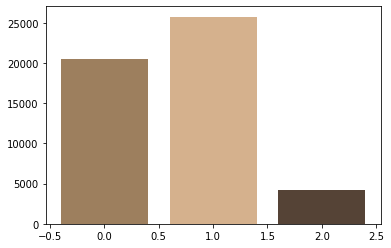

In [8]:
x=list(range(0,3))
y=[]
for key in grps.keys():
    y.append(len(grps[key]))

print(x)
print(y)
color=[]
for i in range(len(centroid)):
    c=[]
    for j in range(len(centroid[i])):
        c.append(centroid[i][j]/255)
    color.append(tuple(c))

plt.bar(x,y,color=color)